In [25]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import plotly.graph_objects as go
import plotly.express as px


# from  error_function import error_function_5

In [26]:
# input the start and end date
cruciform_df = pd.read_pickle('aia_ops/data/catalog/cruciform_df.pkl')
start_time=cruciform_df.loc[10,'Date'] # 2012-07-10 00:00:00
end_time=cruciform_df.loc[11,'Date'] # 2012-10-10 00:00:00
print(start_time,end_time)

# automatically crop the aia_df
# aia_df = aia_df[start_date:end_date]

2012-07-10 00:00:00 2012-10-10 00:00:00


In [27]:
aia_df= pd.read_pickle('aia_ops//data//aia.pkl')
aia_df

,time,image,filename
0,2010-06-01 00:00:08.120,"[[0.003302, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001377,...",./data/AIA_1p5\aia_lev1_304a_2010_06_01t00_00_...
1,2010-06-02 00:05:38.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.276e-05...",./data/AIA_1p5\aia_lev1_304a_2010_06_02t00_05_...
2,2010-06-03 00:00:02.130,"[[0.0, 0.0, 3.535e-05, 0.0, 0.0, 5.496e-05, 0....",./data/AIA_1p5\aia_lev1_304a_2010_06_03t00_00_...
3,2010-06-04 00:00:02.130,"[[0.0, 0.0, 0.0, 0.0004733, 0.0, 0.0, 0.0, 0.0...",./data/AIA_1p5\aia_lev1_304a_2010_06_04t00_00_...
4,2010-06-05 00:00:05.500,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",./data/AIA_1p5\aia_lev1_304a_2010_06_05t00_00_...
...,...,...,...
1455,2014-05-27 00:00:07.140,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_27t00_00_...
1456,2014-05-28 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_28t00_00_...
1457,2014-05-29 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_29t00_00_...
1458,2014-05-30 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2014_05_30t00_00_...


In [22]:
aia_df.loc[0,'time'].date()

datetime.date(2010, 6, 1)

In [32]:
# select the part of aia_df that is within the start and end date
temp_aia_df = aia_df[(aia_df['time'] >= start_time) & (aia_df['time'] <= end_time+pd.Timedelta('1 day'))]

In [38]:
temp_aia_df.reset_index(drop=True, inplace=True)
temp_aia_df.to_pickle('temp//aia//temp_aia_df.pkl')
temp_aia_df

,time,image,filename
0,2012-07-10 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_10t00_00_...
1,2012-07-11 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_11t00_00_...
2,2012-07-12 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_12t00_00_...
3,2012-07-13 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_13t00_00_...
4,2012-07-14 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_14t00_00_...
...,...,...,...
88,2012-10-06 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_06t00_00_...
89,2012-10-07 00:00:07.140,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_07t00_00_...
90,2012-10-08 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_08t00_00_...
91,2012-10-09 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_09t00_00_...


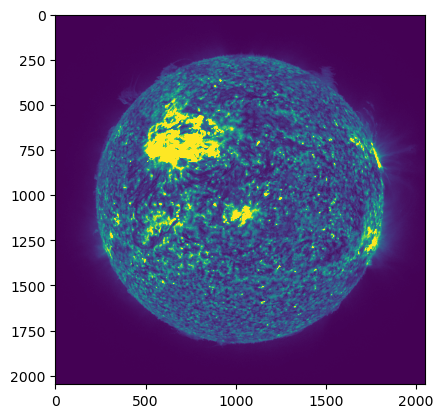

In [37]:
plt.imshow(
    temp_aia_df.loc[0,'image'],
    vmax=200
)

In [ ]:
cruciform_df = pd.read_pickle('aia_ops/data/catalog/cruciform_df.pkl')
start_time=cruciform_df.loc[10,'Date'] # 2012-07-10 00:00:00
end_time=cruciform_df.loc[11,'Date'] # 2012-10-10 00:00:00
print('start_time:',start_time)
print('end_time:',end_time)



aia_df= pd.read_pickle('aia_ops//data//aia.pkl')
temp_aia_df = aia_df[(aia_df['time'] >= start_time) & (aia_df['time'] <= end_time+pd.Timedelta('1 day'))]
temp_aia_df.reset_index(drop=True, inplace=True)
temp_aia_df.to_pickle('temp//aia//temp_aia_df.pkl')

In [41]:
temp_aia_df

,time,image,filename
0,2012-07-10 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_10t00_00_...
1,2012-07-11 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_11t00_00_...
2,2012-07-12 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_12t00_00_...
3,2012-07-13 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_13t00_00_...
4,2012-07-14 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_07_14t00_00_...
...,...,...,...
88,2012-10-06 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_06t00_00_...
89,2012-10-07 00:00:07.140,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_07t00_00_...
90,2012-10-08 00:00:07.120,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_08t00_00_...
91,2012-10-09 00:00:07.130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",./data/AIA_1p5\aia_lev1_304a_2012_10_09t00_00_...


In [ ]:
# I found the only way to have a error function with input:
# main computational data: aia_df,eve_df     These two df should be given out in previous code by setting start_time and end_time
# the minimization parameters: 5 parameters

# I will use the following code to test the error function
minimize(lambda x: error_function(x, temp_aia_df, eve_df), [0, 0, 0, 0, 0], method='Nelder-Mead')

In [43]:
def objective_function(x):
    return (x - y)**8 + x**2



# Example usage:
y = 3

minimize(objective_function, x0=0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.83832143351434
        x: [ 2.089e+00]
      nit: 14
      jac: [-5.960e-07]
 hess_inv: [[ 2.929e-02]]
     nfev: 30
     njev: 15